# Importing the Dataset

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
# 3,4,5,6, -------> low quality wine/bad quality ----> assign 0 for low quality.
# 7 and 8 -------> high quality wine/good quality -----> assign 1 for high quality.
df["quality"].replace([3,4,5,6],0,inplace=True)
df["quality"].replace([7,8],1,inplace=True)

In [7]:
df['quality'].unique()

array([0, 1], dtype=int64)

# EDA

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

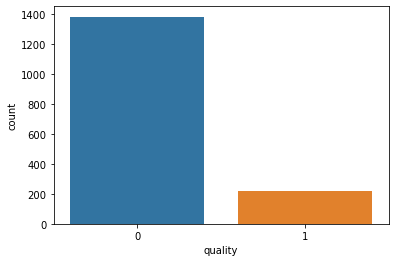

In [9]:
sns.countplot(df['quality']);

In [10]:
df.shape

(1599, 12)

In [11]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

# Missing Value Treatment

In [12]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
cor = df.corr()
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


<AxesSubplot:>

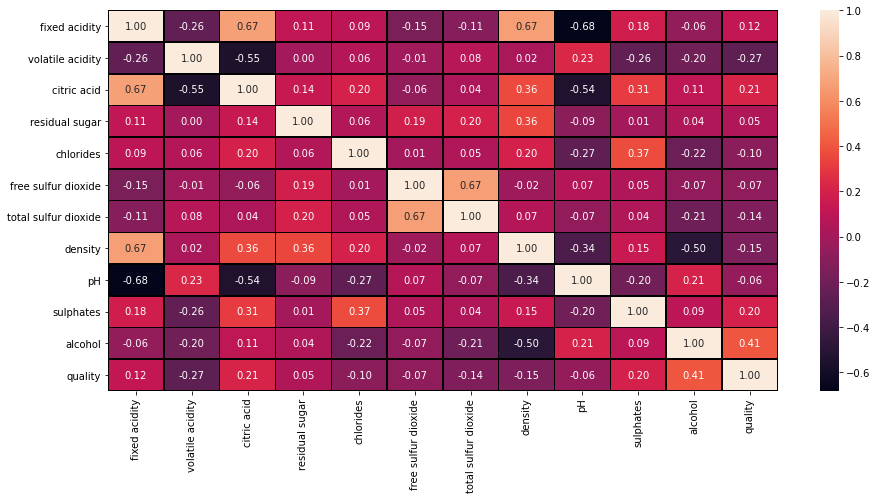

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

# Outcome of correlation

# Describing dataset

In [15]:
df.shape

(1599, 12)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Outliers Checking

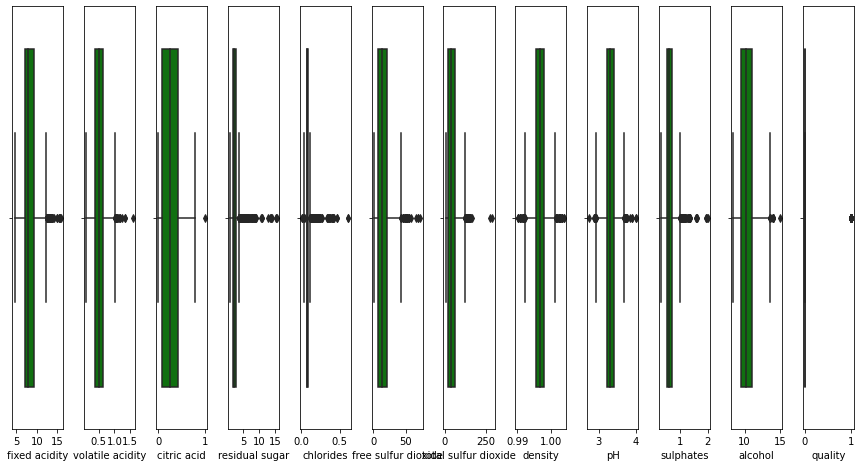

In [17]:
collist = df.columns.values
ncol = 30
nrows = 14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Skewness

In [18]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

# Normal Distribution Curve

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

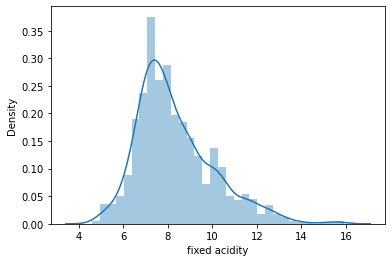

In [19]:
sns.distplot(df["fixed acidity"])

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

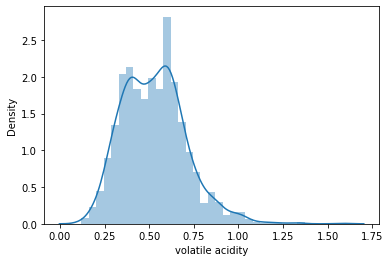

In [20]:
sns.distplot(df["volatile acidity"])

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

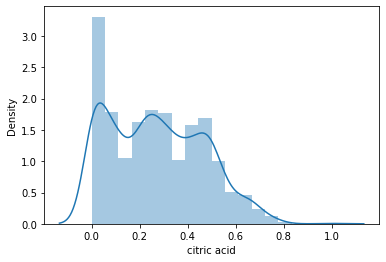

In [21]:
sns.distplot(df["citric acid"])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

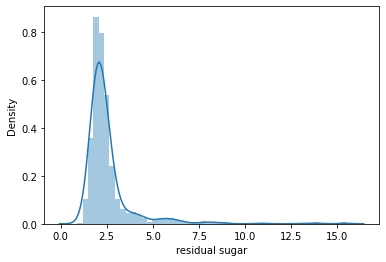

In [22]:
sns.distplot(df["residual sugar"])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

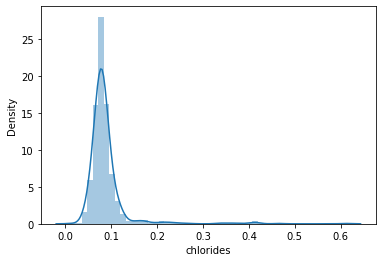

In [23]:
sns.distplot(df["chlorides"])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

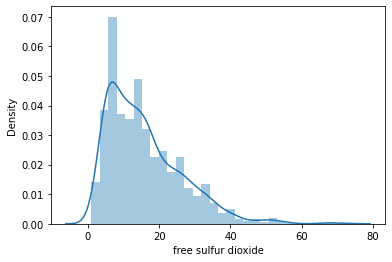

In [24]:
sns.distplot(df["free sulfur dioxide"])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

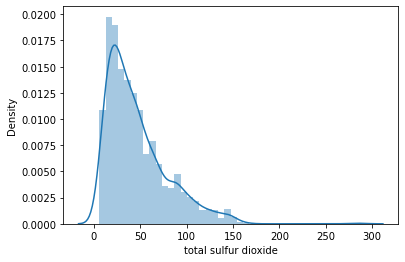

In [25]:
sns.distplot(df["total sulfur dioxide"])

<AxesSubplot:xlabel='density', ylabel='Density'>

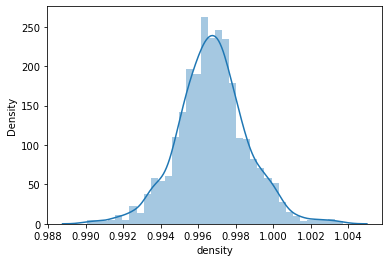

In [27]:
sns.distplot(df["density"])

<AxesSubplot:xlabel='pH', ylabel='Density'>

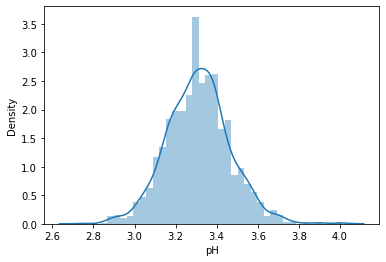

In [28]:
sns.distplot(df["pH"])

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

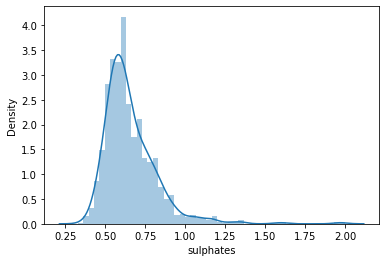

In [29]:
sns.distplot(df["sulphates"])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

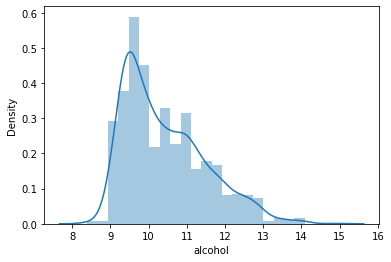

In [30]:
sns.distplot(df["alcohol"])

# Removing Outliers

In [31]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
z.shape

(1599, 12)

In [32]:
threshold = 3

In [33]:
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
        557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
        649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
        695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
        889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
       1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
       1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
       1270, 1270, 1288, 1289, 1295, 1296, 1299, 1

In [34]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


Dividing the data into x and y

In [35]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [36]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [37]:
x

array([[-4.42665887e-01,  9.95541630e-01, -1.53110932e+00, ...,
         1.27568965e+00, -5.81649810e-01, -1.07502541e+00],
       [-1.61307687e-01,  1.77129873e+00, -1.53110932e+00, ...,
        -7.09517433e-01,  3.95139954e-01, -5.00859609e-01],
       [-1.61307687e-01,  1.26980139e+00, -1.25535866e+00, ...,
        -3.10054073e-01,  1.83771552e-01, -5.00859609e-01],
       ...,
       [-1.36436736e+00,  3.87065014e-04, -6.83293826e-01, ...,
         7.18868617e-01,  8.20841495e-01,  7.34557526e-01],
       [-1.76745837e+00,  7.28552770e-01, -7.43826364e-01, ...,
         1.63859528e+00,  5.88343819e-01, -1.87998601e-02],
       [-1.66263981e+00, -1.32045850e+00,  1.03107021e+00, ...,
         5.29831617e-01,  2.56369273e-01,  7.34557526e-01]])

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-4.42665887e-01,  9.95541630e-01, -1.53110932e+00, ...,
         1.27568965e+00, -5.81649810e-01, -1.07502541e+00],
       [-1.61307687e-01,  1.77129873e+00, -1.53110932e+00, ...,
        -7.09517433e-01,  3.95139954e-01, -5.00859609e-01],
       [-1.61307687e-01,  1.26980139e+00, -1.25535866e+00, ...,
        -3.10054073e-01,  1.83771552e-01, -5.00859609e-01],
       ...,
       [-1.36436736e+00,  3.87065014e-04, -6.83293826e-01, ...,
         7.18868617e-01,  8.20841495e-01,  7.34557526e-01],
       [-1.76745837e+00,  7.28552770e-01, -7.43826364e-01, ...,
         1.63859528e+00,  5.88343819e-01, -1.87998601e-02],
       [-1.66263981e+00, -1.32045850e+00,  1.03107021e+00, ...,
         5.29831617e-01,  2.56369273e-01,  7.34557526e-01]])

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score

In [40]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model perform very well")
        print("At random state:-",i)
        print("Training r2_score is:", accuracy_score(y_train,pred_train)*100)
        print("Testing r2_score is:", accuracy_score(y_test,pred_test)*100)

At random state 96 The model perform very well
At random state:- 96
Training r2_score is: 88.42845973416732
Testing r2_score is: 88.4375
At random state 97 The model perform very well
At random state:- 97
Training r2_score is: 88.42845973416732
Testing r2_score is: 88.4375
At random state 99 The model perform very well
At random state:- 99
Training r2_score is: 88.35027365129007
Testing r2_score is: 88.4375
At random state 134 The model perform very well
At random state:- 134
Training r2_score is: 88.35027365129007
Testing r2_score is: 88.4375
At random state 188 The model perform very well
At random state:- 188
Training r2_score is: 88.35027365129007
Testing r2_score is: 88.4375
At random state 231 The model perform very well
At random state:- 231
Training r2_score is: 88.35027365129007
Testing r2_score is: 88.4375
At random state 239 The model perform very well
At random state:- 239
Training r2_score is: 88.11571540265832
Testing r2_score is: 88.125
At random state 240 The model perf

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=899)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       273
           1       0.10      0.04      0.06        47

    accuracy                           0.80       320
   macro avg       0.47      0.49      0.47       320
weighted avg       0.74      0.80      0.77       320



In [43]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    print("At cv:-",j)
    print("cross validation score is:-",lsc*100)
    print("accuracy_score is:-",lss*100)
    print("\n")

At cv:- 2
cross validation score is:- 86.05264392991239
accuracy_score is:- 87.8125


At cv:- 3
cross validation score is:- 86.6166353971232
accuracy_score is:- 87.8125


At cv:- 4
cross validation score is:- 87.55529448621554
accuracy_score is:- 87.8125


At cv:- 5
cross validation score is:- 86.99294670846396
accuracy_score is:- 87.8125


At cv:- 6
cross validation score is:- 87.55432588963045
accuracy_score is:- 87.8125


At cv:- 7
cross validation score is:- 87.11763032034233
accuracy_score is:- 87.8125


At cv:- 8
cross validation score is:- 87.24246231155779
accuracy_score is:- 87.8125


At cv:- 9
cross validation score is:- 87.55439880939787
accuracy_score is:- 87.8125




In [44]:
lsscore_selected = cross_val_score(lr,x,y,cv=4).mean()
print("The cv score is:-", lsscore_selected,"\n The accuracy score is :",lss)

The cv score is:- 0.8755529448621554 
 The accuracy score is : 0.878125


# AUC ROC Curve:

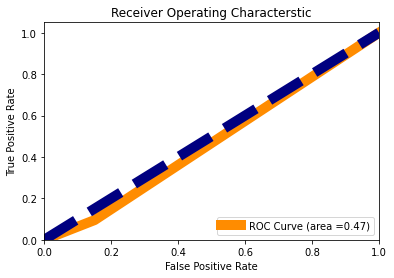

In [45]:
from sklearn.metrics import roc_curve, auc
fpr ,tpr, thresholds = roc_curve(pred_test, y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10, label="ROC Curve (area =%0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',lw=10,linestyle='--')
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characterstic")
plt.legend(loc="lower right")
plt.show()

# Model Saving:

In [46]:
import pickle
filename = "RedWineQuality.pkl"
pickle.dump(lr, open(filename, 'wb'))

In [48]:
import numpy as np
a = np.array(y_test)
predicted = np.array(lr.predict(x_test))
df_com = pd.DataFrame({'original':a,'predicted':predicted}, index = range(len(a)))
df_com

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
315,0,0
316,0,0
317,0,0
318,0,0
